# Goeduhub Technologies - ML Training - Task 15
## Registration ID: GO_STP_939 
## Name: Manoj Kannan D
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#  Assignment-15: Spam Classification using Multinomial Naive Bayes
#### Build a spam filter using Python and the multinomial Naive Bayes algorithm. 
#### Check Spam or Ham? Email Classifier Using Python using MultinomialNB.

# Load Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Explore Data

In [3]:
# dimensions of the dataset
df.ndim

2

In [4]:
df.shape

(5572, 2)

In [5]:
df.size

11144

In [6]:
# columns present in our dataset
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# provides statistical analysis only in numerrical columns
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
# check for null elements
df.isna().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

# Data Visualization

<AxesSubplot:xlabel='Category', ylabel='count'>

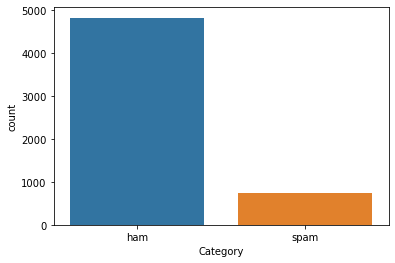

In [11]:
sns.countplot(df['Category'])

# ML Model
## Data PreProcessing

In [12]:
# Label Encode 'Gender' Feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['Category'] = le.fit_transform(df['Category'])

In [14]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Data Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Category, test_size=0.2, random_state=10)

In [17]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (4457,)
y_train: (4457,)
X_test: (1115,)
y_test: (1115,)


In [18]:
print(X_train[0])
print(y_train[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
0


**Machine Learning models does not understand words. So, we need to convert sentences into array of numbers. <br>
Here, we use CountVectorizer to perform the task.**
### CountVectorizer:
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorizer = vectorizer.fit_transform(X_train.values)
X_train_vectorizer

<4457x7723 sparse matrix of type '<class 'numpy.int64'>'
	with 59346 stored elements in Compressed Sparse Row format>

In [20]:
X_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Naive Bayes Model

In [21]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectorizer,y_train)

MultinomialNB()

In [22]:
# Do not fit_transform once again, instead just transform to the size as of X_train_vectorizer.
# ie., Number of features(columns) in X_train_vectorizer and X_test_vectorizer must be same for prediction.
# Size of vectorizer = Number of samples x Number of Features(tokens)
# X_train_vectorizer - 4457x7723 
# X_test_vectorizer - 1115x7723

X_test_vectorizer = vectorizer.transform(X_test)
X_test_vectorizer

<1115x7723 sparse matrix of type '<class 'numpy.int64'>'
	with 13664 stored elements in Compressed Sparse Row format>

In [23]:
predict = model.predict(X_test_vectorizer)

## Out-of-Sample Prediction

In [24]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = vectorizer.transform(emails)
model.predict(emails_count)

array([0, 1])

## Accuracy

In [25]:
print('Training accuracy:',model.score(X_train_vectorizer,y_train))
print('Testing accuracy:',model.score(X_test_vectorizer,y_test))

Training accuracy: 0.9939421135292797
Testing accuracy: 0.9829596412556054


## Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
cm

array([[967,   5],
       [ 14, 129]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

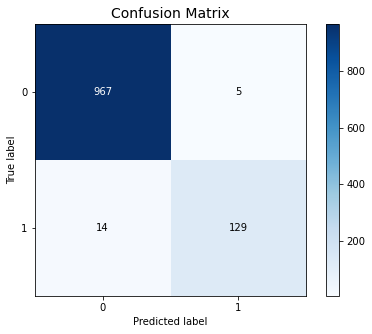

In [27]:
import scikitplot 
scikitplot.metrics.plot_confusion_matrix(y_test, predict, figsize=(7,5), title_fontsize=14)

In [28]:
# Evaluation Metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))
print("F1 Score:",metrics.f1_score(y_test, predict))

Accuracy: 0.9829596412556054
Precision: 0.9626865671641791
Recall: 0.9020979020979021
F1 Score: 0.9314079422382671


## Classification Report

In [29]:
print('Classification Report\n',metrics.classification_report(y_test, predict))

Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       972
           1       0.96      0.90      0.93       143

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# ROC Curve

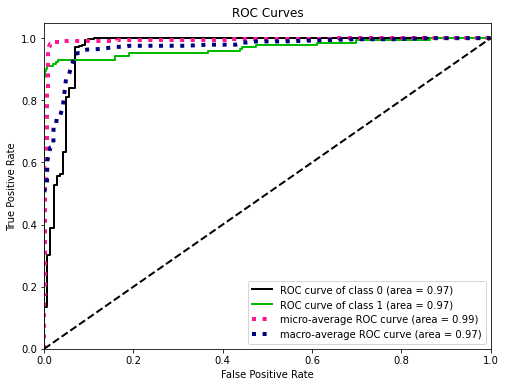

In [30]:
pred_probas = model.predict_proba(X_test_vectorizer)
scikitplot.metrics.plot_roc(y_test,pred_probas,figsize=(8,6))
plt.show()

## Since, area covered is maximum, the model has good performance.